In [1]:
import pandas as pd

In [3]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv', 
                    encoding = 'windows-1251', 
                    sep = ',')

In [ ]:
user_data:
client – идентификатор пользователя
premium – является ли клиент премиальным
age – возраст

In [61]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [6]:
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv', 
                    encoding = 'windows-1251', 
                    sep = ',')

In [ ]:
logs:
client – идентификатор пользователя
success – результат (успех – 1, нет – 0)
platform – платформа
time – время в формате Unix


In [11]:
logs.shape


(4500, 4)

In [12]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

# Уникальные значения

In [13]:
logs.platform.value_counts(normalize=True, dropna= True)

phone       0.611778
computer    0.334444
tablet      0.053778
Name: platform, dtype: float64

# Какой клиент получил большее количество успешных операций?

In [36]:
success_number = logs\
    .query('success == True')\
    .groupby('client', as_index = False)\
    .agg({'platform': "count"})\
    .rename(columns={'platform': 'success_number'})\
    .sort_values('success_number', ascending=False)
    


    

In [38]:
maximum_success = success_number.success_number.max()

In [51]:
successful_clients = success_number.query('success_number == @maximum_success')\
    .sort_values('client')\
    .client\
    .tolist()

# тип данных строка

In [49]:
successfil_clients

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [53]:
for client in successful_clients:
    print(client, end=', ')

12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584, 

join и разделитель

In [55]:
', '.join([str(client) for client in successful_clients])

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

## находим премиальных клиентов

In [75]:
import seaborn as sns

In [69]:
full_base = user_data.merge(logs, on='client')

In [80]:
full_base.query('premium == True')\
        .value_counts('platform')
#какую платформу предпочитают чаще всего

platform
phone       246
computer    150
tablet       24
dtype: int64

### Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с исходными параметрами. Какой график получится в результате?

Используйте датасет, который вы получили на предыдущем шаге.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

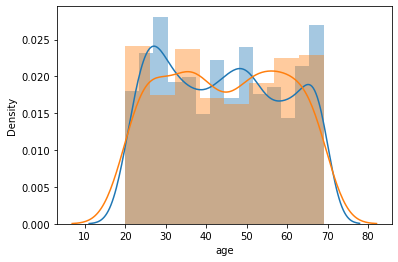

In [90]:
sns.distplot(full_base.query('premium == False').age)
sns.distplot(full_base.query('premium == True').age)

In [109]:
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

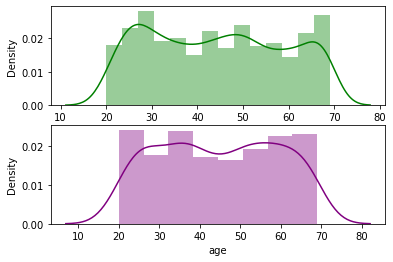

In [112]:
fig, ax = plt.subplots(nrows=2, ncols =1)
sns.distplot(full_base.query('premium == False').age, ax = ax[0], color='green')
sns.distplot(full_base.query('premium == True').age, ax = ax[1], color='purple')

# Постройте график распределения числа успешных операций: 

x – число успешных операций
y – число клиентов, совершивших такое количество успешных операций

In [113]:
full_base

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


### Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, по оси y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

In [146]:
age_vs_success = full_base.query('platform == "computer"')\
 .groupby('age', as_index=False)\
 .agg({'success': 'sum'})

<AxesSubplot:xlabel='age', ylabel='success'>

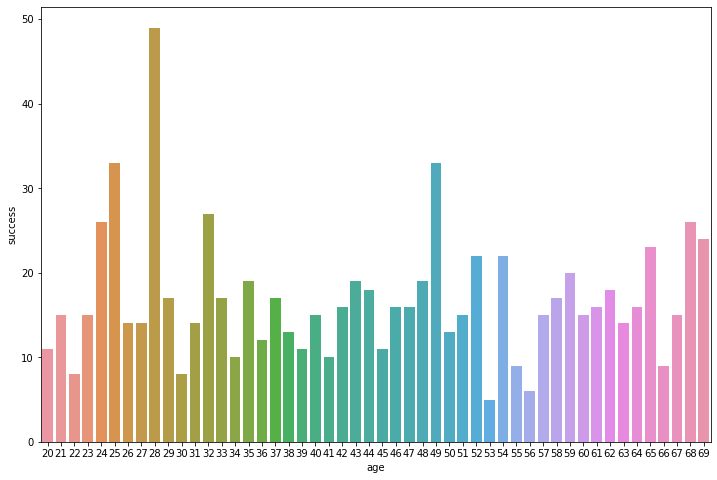

In [149]:
plt.figure(figsize=(12,8))
sns.barplot(x=age_vs_success.age, y=age_vs_success.success)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='client', ylabel='Density'>

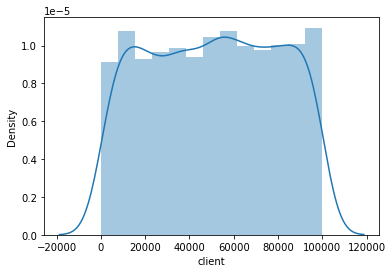

In [131]:
fig, ax = plt.subplots(nrows=1, ncols =1)
sns.distplot(success_data.client)


In [135]:
 client_vs_success_number = full_base\
    .groupby('client', as_index=False)\
    .agg({'success': 'sum'})

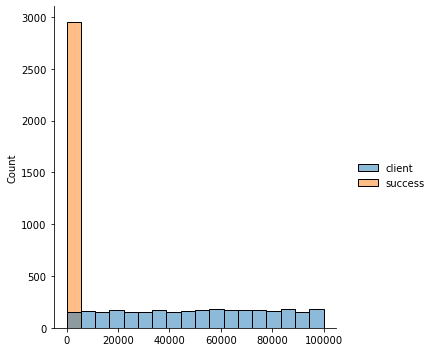

In [137]:
sns.displot(client_vs_success_number)

In [138]:
 client_vs_success_number.success.value_counts()

1     2051
0      850
2       42
41       9
40       1
3        1
Name: success, dtype: int64